In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station=Base.classes.station
measurement=Base.classes.measurement


In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)


# Exploratory Precipitation Analysis

-Design a query to retrieve the last 12 months of precipitation data and plot the results. 

-Find the most recent date in the data set..

-Calculate the date one year from the last date in data set.

In [9]:
past_year_prcp = dt.date(2017, 8, 23) - dt.timedelta(days=365)
most_recent_date= session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


-Perform a query to retrieve the data and precipitation scores 

-Save the query results as a Pandas DataFrame and set the index to the date column

-Sort the dataframe by date

In [10]:
precipitation_scores = session.query(measurement.date, func.avg(measurement.prcp)).\
    filter(measurement.date.between('2016-08-22', '2017-08-23')).\
    group_by(measurement.date).all()

prcp_df = pd.DataFrame(precipitation_scores, columns=['date', 'precipitation'])
prcp_df = prcp_df.set_index('date')
prcp_df = prcp_df.sort_values(["date"])
prcp_df

,precipitation
date,
2016-08-22,1.052000
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


-Use Pandas Plotting with Matplotlib to plot the data

<AxesSubplot:title={'center':'Precipitation'}, xlabel='date', ylabel='precipitation'>

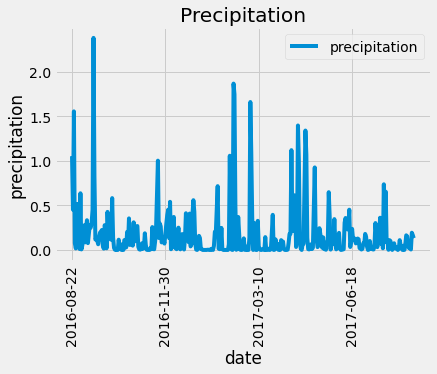

In [11]:
prcp_df.plot(rot=90,title="Precipitation",xlabel='date', ylabel='precipitation')

 Use Pandas to calcualte the summary statistics for the precipitation data


In [12]:
summary_stats_df = prcp_df["precipitation"].describe()
summary_stats_df

count    367.000000
mean       0.173158
std        0.298841
min        0.000000
25%        0.008571
50%        0.070000
75%        0.192500
max        2.380000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station).count()
total_stations

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.date)).group_by(measurement.station).\
    order_by(func.count(measurement.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

In [20]:
#Calculate the lowest temperature
low_temp = [func.min(measurement.tobs)]
low_temp= session.query(*low_temp).\
group_by(measurement.station).\
order_by(func.count(measurement.id).desc()).first()
print("The lowest temperature from 'USC00519281'is: "+ str(low_temp))

The lowest temperature from 'USC00519281'is: (54.0,)


In [21]:
#Calculate the highest temperature
highest_temp = [func.max(measurement.tobs)]
highest_temp = session.query(*highest_temp).\
group_by(measurement.station).\
order_by(func.count(measurement.id).desc()).first()
print("The highest temperature from 'USC00519281' is: "+ str(highest_temp))

The highest temperature from 'USC00519281' is: (85.0,)


In [22]:
#Calculate the average temperature
average_temp = [func.avg(measurement.tobs)]
average_temp = session.query(*average_temp).\
group_by(measurement.station).\
order_by(func.count(measurement.id).desc()).first()
print("The average temperature from 'USC00519281'is: " + str(average_temp))

The average temperature from 'USC00519281'is: (71.66378066378067,)


In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observations=session.query(measurement.tobs).filter(measurement.station=='USC00519281').\
    filter(measurement.date>=past_year_prcp).all()
temp_observations_df = pd.DataFrame(temp_observations)
temp_observations_df.head()




,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


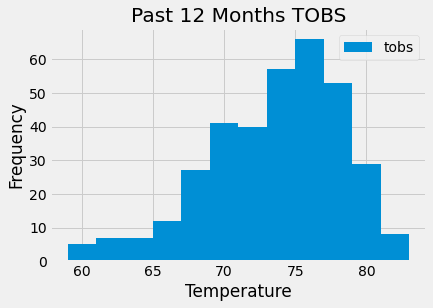

In [18]:
temp_observations_df.plot.hist(bins=12)
plt.title("Past 12 Months TOBS")
plt.xlabel("Temperature")
plt.show()

# Close session

In [19]:
# Close Session
session.close()